# UKL 182, 181 mlmas

# Objective:
Remove seasonality

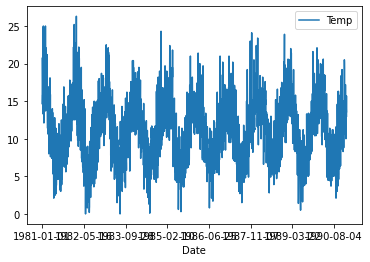

In [3]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('./datasets/daily-minimum-temperatures.csv', header=0, index_col=0)
series.plot()
pyplot.show()

# Seasonal Adjustment with Differencing


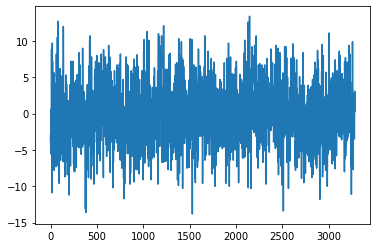

In [4]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('./datasets/daily-minimum-temperatures.csv', header=0, index_col=0)
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
	value = X[i] - X[i - days_in_year]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

In [6]:

from pandas import read_csv
from matplotlib import pyplot
# series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
resample = series.resample('M')
monthly_mean = resample.mean()
print(monthly_mean.head(13))
monthly_mean.plot()
pyplot.show()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

Coefficients: [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


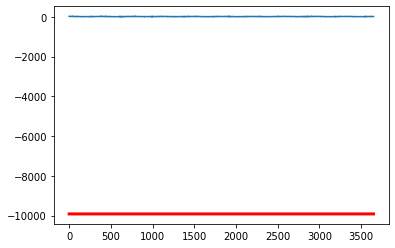

In [7]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
# series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

In [8]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced forecast
def inverse_difference(last_ob, value):
	return value + last_ob
 
# define a dataset with a linear trend
data = [i+1 for i in range(20)]
print(data)
# difference the dataset
diff = difference(data)
print(diff)
# invert the difference
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]
print(inverted)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


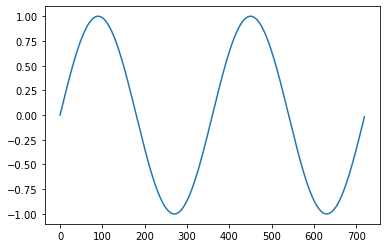

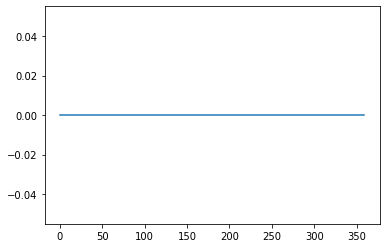

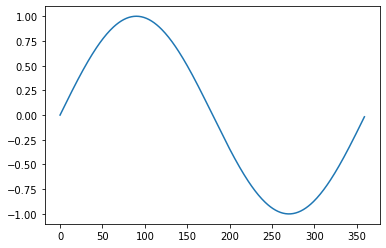

In [9]:

from math import sin
from math import radians
from matplotlib import pyplot
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced forecast
def inverse_difference(last_ob, value):
	return value + last_ob
 
# define a dataset with seasonality
data = [sin(radians(i)) for i in range(360)] + [sin(radians(i)) for i in range(360)]
pyplot.plot(data)
pyplot.show()
# difference the dataset
diff = difference(data, 360)
pyplot.plot(diff)
pyplot.show()
# invert the difference
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]
pyplot.plot(inverted)
pyplot.show()